일반적인 특성의 전형적인 형태는 **범주형 특성** 또는 **이산형 특성**
> 범주형 특성의 예 : 제품의 브랜드, 색상, 판매 분류

특정 애플리케이션에 가장 적합한 데이터 표현을 찾는 것 --> **특성공학**


## 범주형 변수

**adult 데이터 셋**
age , hours-per-week : 연속형 특성
workclass, education, sex, occupation : 범주형 특성


### 원-핫-인코딩(가변수)
> 범주형 변수를 표현하는데 가장 많이 쓰이는 방법 

workclass 특성에 "Government Employee", "Private Employee", "Self Employed", "Self Employed Incorporated"란 특성이 있다고 하고, 만약 한 사람이 Private Employee일 때 0 1 0 0 으로 각각 특성에 맞는 값이 할당된다 -> **1이 특성들 중에 하나만 배치된다. : 원-핫-인코딩**



In [2]:
import os
import mglearn
import pandas as pd

data = pd.read_csv(
    os.path.join(mglearn.datasets.DATA_PATH, "adult.data"), header = None, index_col = False,
    names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num','marital-status','occupation','relationship','race','gender','capital-gain','capital-loss','hours-per-week','native-country','incom'])
data = data[['age','workclass','education','gender','hours-per-week','occupation','incom']]
display(data.head())


,age,workclass,education,gender,hours-per-week,occupation,incom
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [3]:
print(data.gender.value_counts())
#유일한 값이 각각 몇 번 나오는지 출력하는 메서드

 Male      21790
 Female    10771
Name: gender, dtype: int64


In [4]:
print("원본 특성\n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("get_dummies 후의 특성:\n", list(data_dummies.columns))
#get dummies는 인코딩을 해주는 메서드
#출력 결과를 보면 범주형 특성이 확장된 것을 볼 수 있다.


원본 특성
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'incom'] 

get_dummies 후의 특성:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Ot

In [5]:
display(data_dummies.head())

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,incom_ <=50K,incom_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [6]:
# 모델 학습을 위해서 income 특성 분리
features = data_dummies.loc[:,'age':'occupation_ Transport-moving']
X = features.values
y = data_dummies['incom_ >50K'].values
print("X.shape: {} y.shape: {}".format(X.shape, y.shape))

X.shape: (32561, 44) y.shape: (32561,)


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("테스트 점수: {:.2f}".format(logreg.score(X_test, y_test)))

테스트 점수: 0.81


C:\Users\dkstj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



### 숫자로 표현된 범주형 특성
> 범주형 특성이 숫자로 되어있을 때

get dummies 함수는 숫자 특성은 모두 연속형이라고 생각 --> 가변수를 만들지 않음


In [8]:
demo_df = pd.DataFrame({'숫자 특성': [0,1,2,1], '범주형 특성': ['양말','여우','양말','상자']})
display(demo_df)

,숫자 특성,범주형 특성
0,0,양말
1,1,여우
2,2,양말
3,1,상자


In [9]:
display(pd.get_dummies(demo_df))
# 문자로 된 특성만 가변수가 생김

,숫자 특성,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,0,0,1,0
1,1,0,0,1
2,2,0,1,0
3,1,1,0,0


In [10]:
# 숫자 특성도 가변수로 만들고 싶으면 columns 매개변수에 인코딩하고 싶은 열을 명시해야함
demo_df['숫자 특성'] = demo_df['숫자 특성'].astype(str)
display(pd.get_dummies(demo_df, columns=['숫자 특성','범주형 특성']))

,숫자 특성_0,숫자 특성_1,숫자 특성_2,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,1,0,0,0,1,0
1,0,1,0,0,0,1
2,0,0,1,0,1,0
3,0,1,0,1,0,0




## OneHotEncoder와 ColumnTransformer

OneHotEncoder은 모든 열에 인코딩을 수행한다. 


In [11]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse = False)
print(ohe.fit_transform(demo_df))
# 넘파이 배열을 반환한 것이기 때문에 열이름이 없음 -> 열 이름 얻으려면 get_feature_names 사용

[[1. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0.]]


In [12]:
print(ohe.get_feature_names())

['x0_0' 'x0_1' 'x0_2' 'x1_상자' 'x1_양말' 'x1_여우']


ColumnTransformer는 입력 데이터에 있는 열마다 다른 변환을 적용할 수 있음
> 연속형 변수인 age, hours-per-week의 스케일 조정에도 필요함

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer(
    [("scaling", StandardScaler(), ['age','hours-per-week']),
    ("onehot", OneHotEncoder(sparse = False), ['workclass','education','gender', 'occupation'])])

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

data_features = data.drop("incom", axis = 1)
X_train, X_test, y_train, y_test = train_test_split(
data_features, data.incom, random_state = 0)

ct.fit(X_train)
X_train_trans = ct.transform(X_train)
print(X_train_trans.shape)

(24420, 44)


In [17]:
#로지스틱 회귀로 학습
logreg = LogisticRegression()
logreg.fit(X_train_trans ,y_train)
X_test_trans = ct.transform(X_test)
print("테스트 점수: {:.2f}".format(logreg.score(X_test_trans, y_test)))

테스트 점수: 0.81


C:\Users\dkstj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


스케일을 넣은것이 큰 영향이 없다. 
하나의 변환기로 모든 전처리 단계를 캡츌화 하면 장점이 있다. 

columnTransformer 안의 단계에 접근하려면 named_transformers_속성을 사용


In [18]:
ct.named_transformers_.onehot

OneHotEncoder(sparse=False)



## make_column_transformer로 간편하게 ColumnTransformer 만들기

클래스 이름을 기반으로 자동으로 각 단계의 이름을 붙여주는 **make_column_transformer**



In [19]:
from sklearn.compose import make_column_transformer

ct = make_column_transformer(
    (['age', 'hours-per-week'], StandardScaler()), (['workclass','education','gender', 'occupation'], OneHotEncoder(sparse = False)))


## 구간 분할, 이산화 그리고 선형 모델, 트리 모델

데이터를 가장 잘 표현하는 방법은 데이터가 가진 의미뿐 아니라 어떤 모델을 사용하는지에 따라 다르다.

**wave로 선형 회귀 모델과 결정 트리 회귀 비교**

C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51077 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47141 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44480 missing from c

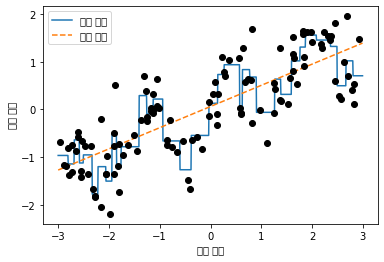

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt

X, y = mglearn.datasets.make_wave(n_samples = 120)
line = np.linspace(-3,3,1000, endpoint= False).reshape(-1,1)

reg = DecisionTreeRegressor(min_samples_leaf = 3).fit(X, y)
plt.plot(line, reg.predict(line), label = "결정 트리")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), '--', label="선형 회귀")

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")

연속형 데이터에 아주 강력한 선형 모델을 만드는 방법 하나는 한 특성을 여러 특성으로 나누는 **구간 분할**이다. 